In [43]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [45]:
display(df)

Age Attrition    Business Travel  Daily Rate              Department  \
0      41       Yes      Travel_Rarely        1102                   Sales   
1      49        No  Travel_Frequently         279  Research & Development   
2      37       Yes      Travel_Rarely        1373  Research & Development   
3      33        No  Travel_Frequently        1392  Research & Development   
4      27        No      Travel_Rarely         591  Research & Development   
...   ...       ...                ...         ...                     ...   
1465   36        No  Travel_Frequently         884  Research & Development   
1466   39        No      Travel_Rarely         613  Research & Development   
1467   27        No      Travel_Rarely         155  Research & Development   
1468   49        No  Travel_Frequently        1023                   Sales   
1469   34        No      Travel_Rarely         628  Research & Development   

      Distance From Home      Education Education Field  Employee Count  \
0                      1        College   Life Sciences               1   
1                      8  Below College   Life Sciences               1   
2                      2        College           Other               1   
3                      3         Master   Life Sciences               1   
4                      2  Below College         Medical               1   
...                  ...            ...             ...             ...   
1465                  23        College         Medical               1   
1466                   6  Below College         Medical               1   
1467                   4       Bachelor   Life Sciences               1   
1468                   2       Bachelor         Medical               1   
1469                   8       Bachelor         Medical               1   

      Employee Number  ...  Relationship Satisfaction Standard Hours  \
0                   1  ...                          1             80   
1                   2  ...                          4             80   
2                   4  ...                          2             80   
3                   5  ...                          3             80   
4                   7  ...                          4             80   
...               ...  ...                        ...            ...   
1465             2061  ...                          3             80   
1466             2062  ...                          1             80   
1467             2064  ...                          2             80   
1468             2065  ...                          4             80   
1469             2068  ...                          1             80   

      Stock Option Level  Total Working Years  Training Times Last Year  \
0                      0                    8                         0   
1                      1                   10                         3   
2                      0                    7                         3   
3                      0                    8                         3   
4                      1                    6                         3   
...                  ...                  ...                       ...   
1465                   1                   17                         3   
1466                   1                    9                         5   
1467                   1                    6                         0   
1468                   0                   17                         3   
1469                   0                    6                         3   

     Work Life Balance  Years At Company Years In Current Role  \
0                    1                 6                     4   
1                    3                10                     7   
2                    3                 0                     0   
3                    3                 8                     7   
4                    3                 2                     2   
...   

In [46]:
# Assuming df is your DataFrame and it has an 'Age' column
# Define the age bins and labels
bins1 = [18, 30, 45, 60]  # Edges of the bins
labels1 = ['18-30', '31-45', '46-60']  # Labels for the bins

bins2 = [0, 5, 10, float('inf')]  # Edges of the bins
labels2 = ['0-5', '5-10', '>10']  # Labels for the bins

bins3 = [0, 10, 20, 30, 40]  # Edges of the bins
labels3 = ['0-10', '10-20', '20-30', '30-40']  # Labels for the bins

# Create a new column 'Age Range' with the categorized data
df['Age Range'] = pd.cut(df['Age'], bins=bins1, labels=labels1, right=True)
df['Distance From Home Range'] = pd.cut(df['Distance From Home'], bins=bins2, labels=labels2, right=True)
df['Years At Company Range'] = pd.cut(df['Years At Company'], bins=bins3, labels=labels3, right=True)
df['Years In Current Role Range'] = pd.cut(df['Years In Current Role'], bins=bins3, labels=labels3, right=True)
df['Years Since Last Promotion Range'] = pd.cut(df['Years Since Last Promotion'], bins=bins3, labels=labels3, right=True)
df['Years With Current Manager Range'] = pd.cut(df['Years With Current Manager'], bins=bins3, labels=labels3, right=True)

# Display the first few rows to check the new column
display(df)

Age Attrition    Business Travel  Daily Rate              Department  \
0      41       Yes      Travel_Rarely        1102                   Sales   
1      49        No  Travel_Frequently         279  Research & Development   
2      37       Yes      Travel_Rarely        1373  Research & Development   
3      33        No  Travel_Frequently        1392  Research & Development   
4      27        No      Travel_Rarely         591  Research & Development   
...   ...       ...                ...         ...                     ...   
1465   36        No  Travel_Frequently         884  Research & Development   
1466   39        No      Travel_Rarely         613  Research & Development   
1467   27        No      Travel_Rarely         155  Research & Development   
1468   49        No  Travel_Frequently        1023                   Sales   
1469   34        No      Travel_Rarely         628  Research & Development   

      Distance From Home      Education Education Field  Employee Count  \
0                      1        College   Life Sciences               1   
1                      8  Below College   Life Sciences               1   
2                      2        College           Other               1   
3                      3         Master   Life Sciences               1   
4                      2  Below College         Medical               1   
...                  ...            ...             ...             ...   
1465                  23        College         Medical               1   
1466                   6  Below College         Medical               1   
1467                   4       Bachelor   Life Sciences               1   
1468                   2       Bachelor         Medical               1   
1469                   8       Bachelor         Medical               1   

      Employee Number  ...  Years At Company Years In Current Role  \
0                   1  ...                 6                     4   
1                   2  ...                10                     7   
2                   4  ...                 0                     0   
3                   5  ...                 8                     7   
4                   7  ...                 2                     2   
...               ...  ...               ...                   ...   
1465             2061  ...                 5                     2   
1466             2062  ...                 7                     7   
1467             2064  ...                 6                     2   
1468             2065  ...                 9                     6   
1469             2068  ...                 4                     3   

      Years Since Last Promotion  Years With Current Manager  Age Range  \
0                              0                           5      31-45   
1                              1                           7      46-60   
2                              0                           0      31-45   
3                              3                           0      31-45   
4                              2                           2      18-30   
...                          ...                         ...        ...   
1465                           0                           3      31-45   
1466                           1                           7      31-45   
1467                           0                           3      18-30   
1468                           0                           8      46-60   
1469                           1                           2      31-45   

     Distance From Home Range  Years At Company Range  \
0                         0-5                    0-10   
1                        5-10                    0-10   
2                         0-5                     NaN   
3                         0-5                    0-10   
4                         0-5                    0-10   
...                       ...                     ...   
1465                      >

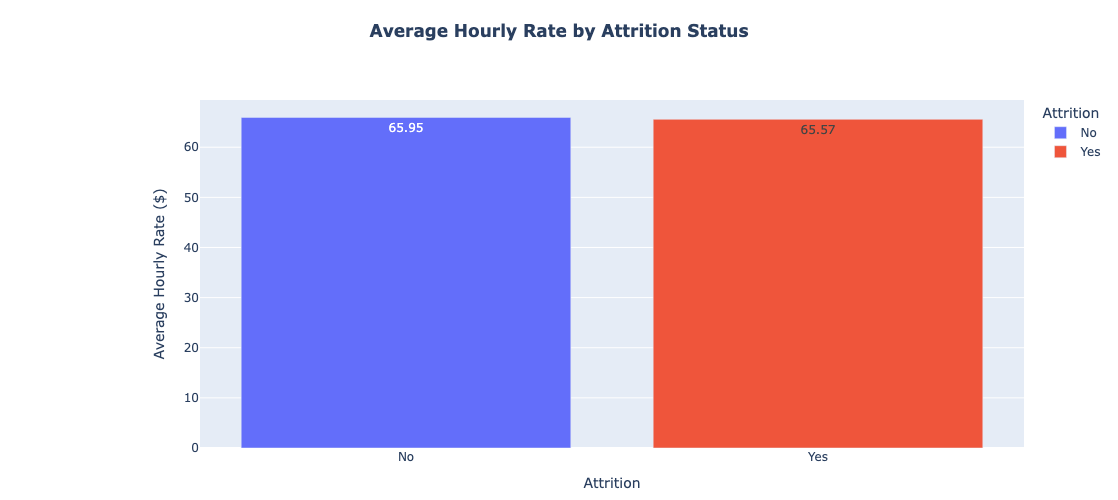

In [52]:
# Assuming df is already loaded and cleaned
# Filter the DataFrame for attrition 'Yes' and 'No'
df_attrition_yes = df[df['Attrition'] == 'Yes']
df_attrition_no = df[df['Attrition'] == 'No']

# Calculate the average Hourly Rate for each attrition status
avg_hourly_rate = df.groupby('Attrition')['Hourly Rate'].mean().round(2).reset_index()

# Create the bar chart to compare Average Hourly Rate for Attrition Yes and No
fig_hourly_rate = px.bar(
    avg_hourly_rate,
    x='Attrition',
    y='Hourly Rate',
    title='<b>Average Hourly Rate by Attrition Status',
    labels={'Hourly Rate': 'Average Hourly Rate ($)', 'Attrition Status': 'Attrition Status'},
    color='Attrition',  # Color by Attrition Status
    text='Hourly Rate'  # Display the average hourly rate on the bars
)

# Customize the layout
fig_hourly_rate.update_layout(
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust title position
    margin=dict(l=200, r=20, t=100, b=40),  # Adjust margins
    height=500,  # Set plot height
    width=900  # Set plot width
)

# Show the plot
fig_hourly_rate.show()


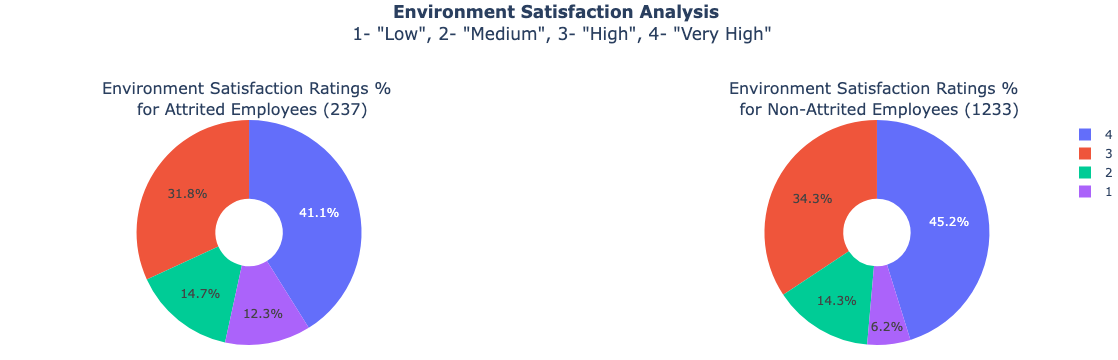

In [14]:
# Assuming df is already loaded and cleaned
df_attrition_yes = df[df['Attrition'] == 'Yes']
df_attrition_no = df[df['Attrition'] == 'No']

# Count total rows for each filtered DataFrame
attrition_yes_count = df_attrition_yes.shape[0]  # Total rows in df_attrition_yes
attrition_no_count = df_attrition_no.shape[0]    # Total rows in df_attrition_no

# Create subplots with 3 rows and 2 columns
figA = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=(
        f'Environment Satisfaction Ratings % <br> for Attrited Employees ({attrition_yes_count})', 
        f'Environment Satisfaction Ratings % <br> for Non-Attrited Employees ({attrition_no_count})',
    ),
    vertical_spacing=0.4,  # Adjust vertical spacing between rows
    horizontal_spacing=0.3 # Adjust horizontal spacing between columns
)

# Create and add the first pie chart
fig1 = px.pie(df_attrition_yes, 
              values='Environment Satisfaction', 
              names='Environment Satisfaction',
              hole=0.3)
figA.add_trace(fig1.data[0], row=1, col=1)

# Create and add the second pie chart
fig2 = px.pie(df_attrition_no, 
              values='Environment Satisfaction', 
              names='Environment Satisfaction', 
              hole=0.3)
figA.add_trace(fig2.data[0], row=1, col=2)

# Update layout to include titles and adjust spacing
figA.update_layout(
    title_text='<b>Environment Satisfaction Analysis</b> <br> 1- "Low", 2- "Medium", 3- "High", 4- "Very High"',
    title_x=0.5,  # Center the title horizontally
    title_y=0.95,  # Position the title slightly lower
    margin=dict(l=80, r=0, t=120, b=15)  # Adjust margins to ensure enough space
)

# Show the combined figure
figA.show()


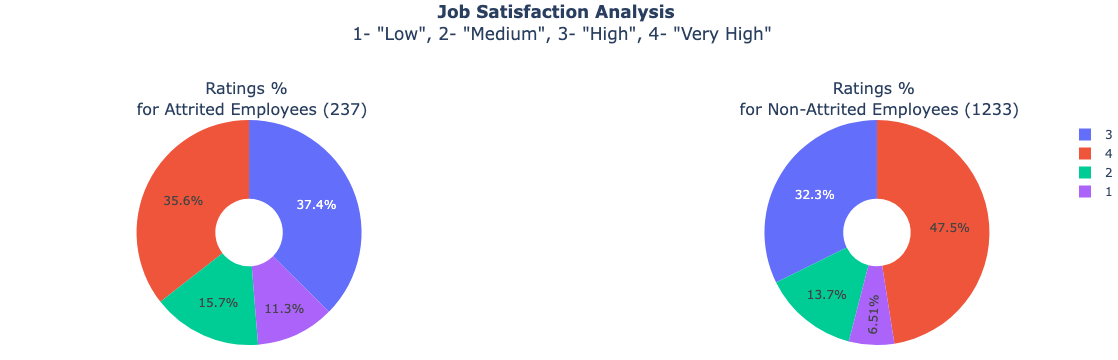

In [15]:

# Create subplots with 3 rows and 2 columns
figB = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=(
        f'Ratings % <br> for Attrited Employees ({attrition_yes_count})', 
        f'Ratings % <br> for Non-Attrited Employees ({attrition_no_count})'
    ),
    vertical_spacing=0.4,  # Adjust vertical spacing between rows
    horizontal_spacing=0.3 # Adjust horizontal spacing between columns
)

# Create and add the third pie chart
fig3 = px.pie(df_attrition_yes, 
              values='Job Satisfaction', 
              names='Job Satisfaction', 
              hole=0.3)
figB.add_trace(fig3.data[0], row=1, col=1)

# Create and add the fourth pie chart
fig4 = px.pie(df_attrition_no, 
              values='Job Satisfaction', 
              names='Job Satisfaction', 
              hole=0.3)
figB.add_trace(fig4.data[0], row=1, col=2)

# Update layout to include titles and adjust spacing
figB.update_layout(
    title_text='<b>Job Satisfaction Analysis</b> <br> 1- "Low", 2- "Medium", 3- "High", 4- "Very High"',
    title_x=0.5,  # Center the title horizontally
    title_y=0.95,  # Position the title slightly lower
    margin=dict(l=80, r=0, t=120, b=15)  # Adjust margins to ensure enough space
)

# Show the combined figure
figB.show()


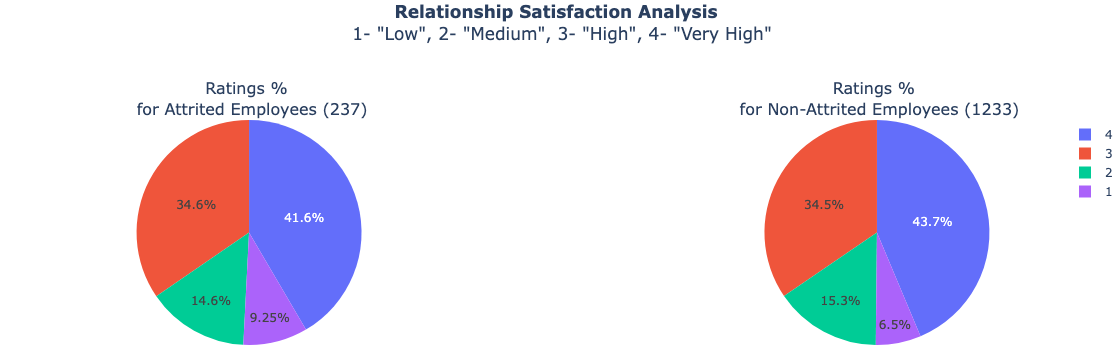

In [16]:

# Create subplots
figC = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=(
        f'Ratings % <br> for Attrited Employees ({attrition_yes_count})', 
        f'Ratings % <br> for Non-Attrited Employees ({attrition_no_count})'
    ),
    vertical_spacing=0.4,  # Adjust vertical spacing between rows
    horizontal_spacing=0.3 # Adjust horizontal spacing between columns
)


# Create and add the fifth pie chart
fig5 = px.pie(df_attrition_yes, 
              values='Relationship Satisfaction', 
              names='Relationship Satisfaction', 
              hole=0.0)
figC.add_trace(fig5.data[0], row=1, col=1)

# Create and add the sixth pie chart
fig6 = px.pie(df_attrition_no, 
              values='Relationship Satisfaction', 
              names='Relationship Satisfaction', 
              hole=0.0)
figC.add_trace(fig6.data[0], row=1, col=2)

# Update layout to include titles and adjust spacing
figC.update_layout(
    title_text='<b>Relationship Satisfaction Analysis</b> <br> 1- "Low", 2- "Medium", 3- "High", 4- "Very High"',
    title_x=0.5,  # Center the title horizontally
    title_y=0.95,  # Position the title slightly lower
    margin=dict(l=80, r=0, t=120, b=15)  # Adjust margins to ensure enough space
)
# Show the combined figure
figC.show()


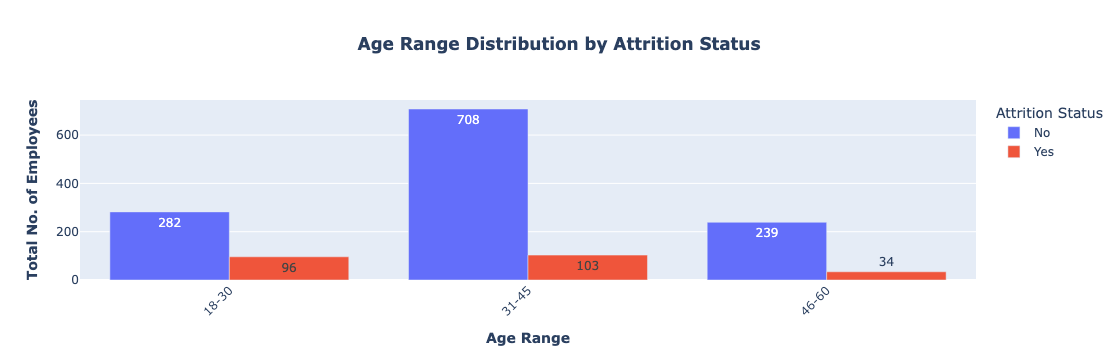

In [17]:
# Group by 'Age Range' and 'Attrition' and count occurrences
age_range_attrition_counts = df.groupby(['Age Range', 'Attrition'], observed="True").size().reset_index(name='Count')


# Create the bar chart
fig7 = px.bar(age_range_attrition_counts, 
             x='Age Range', 
             y='Count', 
             color='Attrition', 
             title='<b>Age Range Distribution by Attrition Status',
             labels={'Age Range': 'Age Range', 'Count': 'Total Number of Employees', 'Attrition': 'Attrition Status'},
             barmode='group',text_auto = True)  # Use 'group' to show bars side-by-side

# Customize layout for better visibility
fig7.update_layout(
    xaxis_title='<b>Age Range</b>',
    yaxis_title='<b>Total No. of Employees',
    title_x=0.5,  # Center the title horizontally
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
    
)


fig7.show()




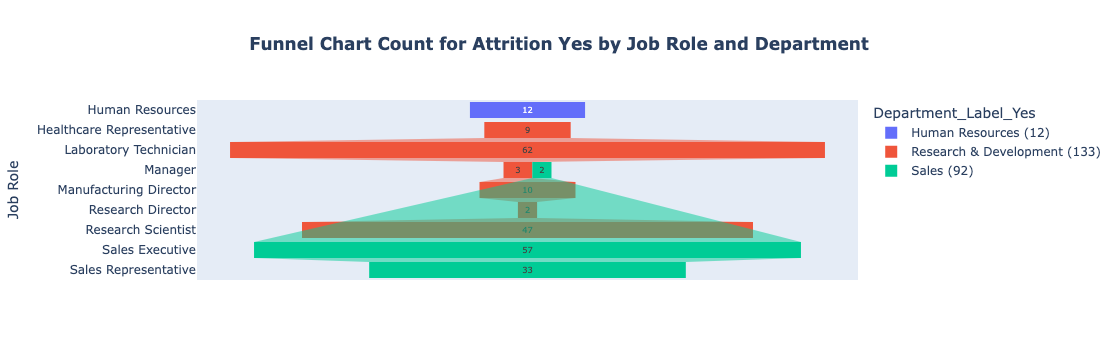

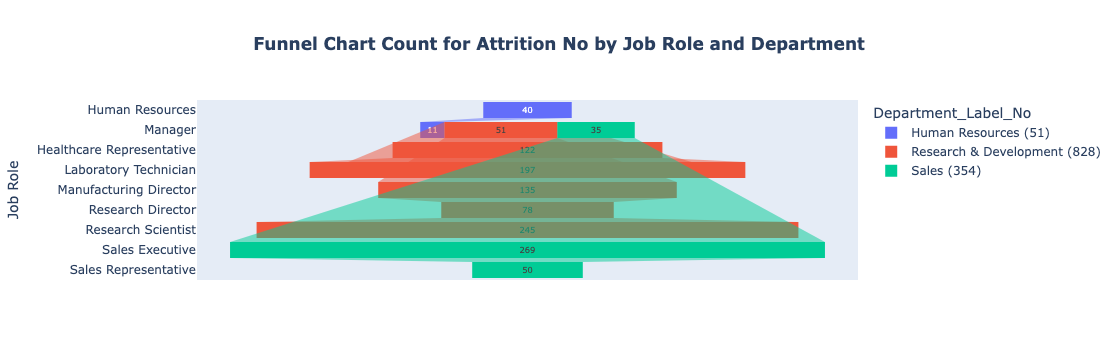

In [18]:

# Group by 'Department', 'Job Role', and 'Attrition' and count occurrences
job_role_attrition_counts = df.groupby(['Department', 'Job Role', 'Attrition'], observed="True").size().reset_index(name='Count')

# Calculate the total 'Yes' and 'No' attrition per department
attrition_totals_yes = job_role_attrition_counts[job_role_attrition_counts['Attrition'] == 'Yes'].groupby('Department')['Count'].sum().reset_index(name='Total Yes Attrition')
attrition_totals_no = job_role_attrition_counts[job_role_attrition_counts['Attrition'] == 'No'].groupby('Department')['Count'].sum().reset_index(name='Total No Attrition')

# Merge the totals back into the main DataFrame
job_role_attrition_counts = pd.merge(job_role_attrition_counts, attrition_totals_yes, on='Department', how='left')
job_role_attrition_counts = pd.merge(job_role_attrition_counts, attrition_totals_no, on='Department', how='left')

# Create custom labels that include the department name and the total attrition count for 'Yes' and 'No'
job_role_attrition_counts['Department_Label_Yes'] = job_role_attrition_counts['Department'] + ' (' + job_role_attrition_counts['Total Yes Attrition'].astype(str) + ')'
job_role_attrition_counts['Department_Label_No'] = job_role_attrition_counts['Department'] + ' (' + job_role_attrition_counts['Total No Attrition'].astype(str) + ')'

# Separate the counts for 'Attrition' Yes and 'Attrition' No
job_role_attrition_yes = job_role_attrition_counts[job_role_attrition_counts['Attrition'] == 'Yes']
job_role_attrition_no = job_role_attrition_counts[job_role_attrition_counts['Attrition'] == 'No']

# Create funnel chart for Attrition = Yes
fig8 = px.funnel(job_role_attrition_yes, 
                 x='Count', 
                 y='Job Role', 
                 color='Department_Label_Yes',  # Use the custom label with totals for 'Yes'
                 title='<b>Funnel Chart Count for Attrition Yes by Job Role and Department')

# Create funnel chart for Attrition = No
fig9 = px.funnel(job_role_attrition_no, 
                 x='Count', 
                 y='Job Role', 
                 color='Department_Label_No',  # Use the custom label with totals for 'No'
                 title='<b>Funnel Chart Count for Attrition No by Job Role and Department')


fig8.update_layout(
    title_x=0.5  # Center align the title
)

fig9.update_layout(
    title_x=0.5  # Center align the title
)


# Show charts separately
fig8.show()
fig9.show()



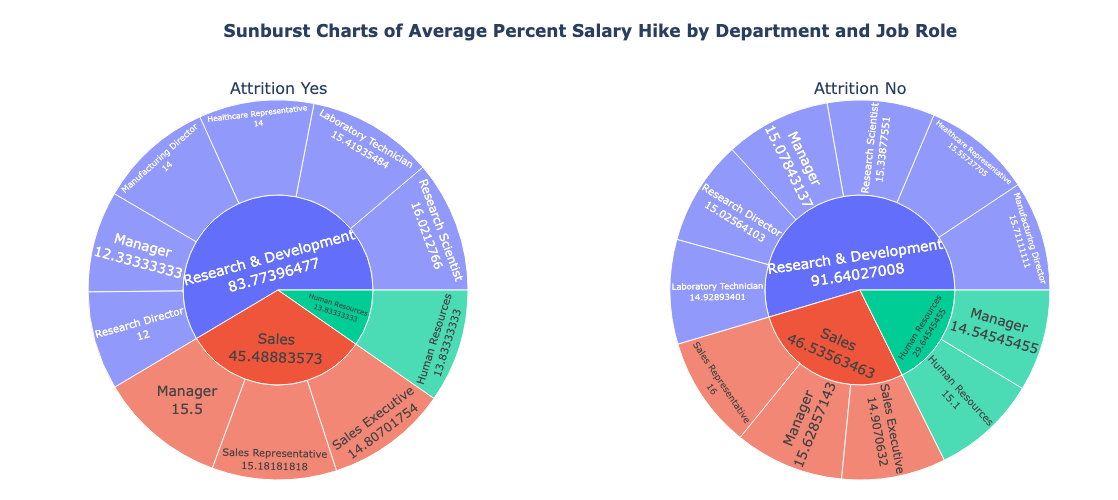

In [19]:

# Assuming df is already loaded
# Filter the DataFrame for attrition 'Yes' and 'No'
attrition_yes_df = df[df['Attrition'] == 'Yes']
attrition_no_df = df[df['Attrition'] == 'No']

# Group by 'Department' and 'Job Role' and calculate the mean percentage salary hike for both attrition types
salary_hike_yes = attrition_yes_df.groupby(['Department', 'Job Role'])['Percent Salary Hike'].mean().reset_index()
salary_hike_no = attrition_no_df.groupby(['Department', 'Job Role'])['Percent Salary Hike'].mean().reset_index()

# Create subplots with 1 row and 2 columns
figD = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Attrition Yes', 'Attrition No'),
    specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]]  # Specify sunburst plots
)

# Create the sunburst chart for Attrition Yes
fig_yes = px.sunburst(
    salary_hike_yes,
    path=['Department', 'Job Role'],
    values='Percent Salary Hike',
    labels={'Percent Salary Hike': 'Average Percent Salary Hike'}
)

# Add the sunburst chart for Attrition Yes to the subplot
for trace in fig_yes.data:
    figD.add_trace(trace, row=1, col=1)

# Create the sunburst chart for Attrition No
fig_no = px.sunburst(
    salary_hike_no,
    path=['Department', 'Job Role'],
    values='Percent Salary Hike',
    labels={'Percent Salary Hike': 'Average Percent Salary Hike'}
)

# Add the sunburst chart for Attrition No to the subplot
for trace in fig_no.data:
    figD.add_trace(trace, row=1, col=2)

# Customize layout to increase plot size and readability
figD.update_layout(
    title_text='<b>Sunburst Charts of Average Percent Salary Hike by Department and Job Role',
    title_x=0.20,  # Center the title horizontally
    title_y=0.95,  # Position the title slightly lower
    margin=dict(t=100, l=40, r=20, b=20),  # Adjust margins to provide more space
    width=1000,  # Set plot width
    height=500  # Set plot height
)

# Add labels directly in the sunburst chart
figD.update_traces(textinfo='label+value', textfont_size=14)  # Show label and value in each sector

# Show the sunburst charts
figD.show()


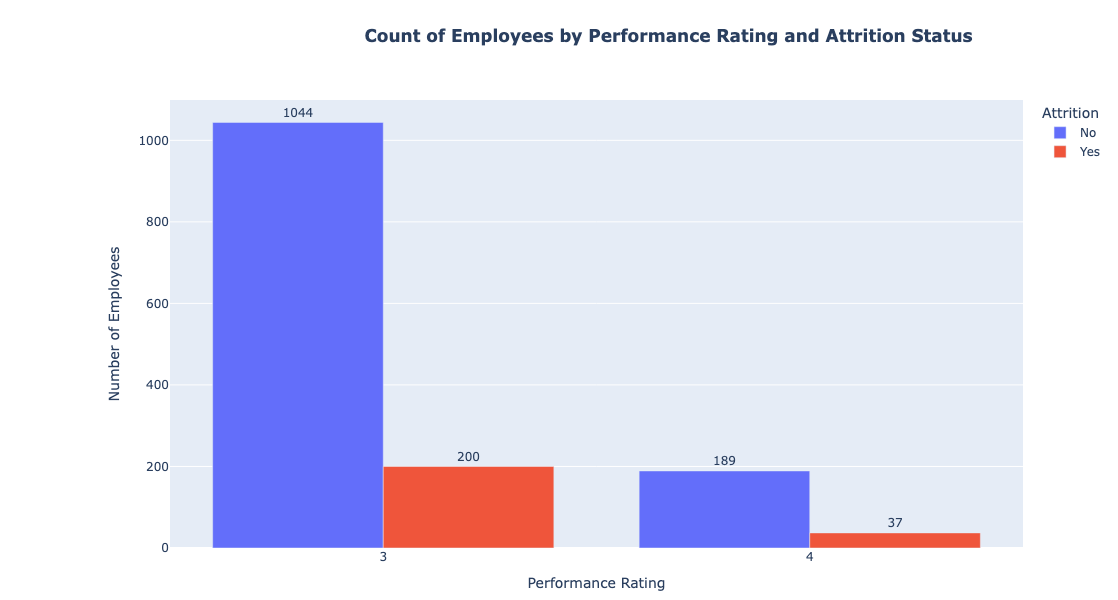

In [20]:
# Group by 'Attrition' and 'Performance Rating', and count the number of employees
performance_rating_counts = df.groupby(['Attrition', 'Performance Rating']).size().reset_index(name='Count')

# Create the bar chart
figE = px.bar(
    performance_rating_counts,
    x='Performance Rating',
    y='Count',
    color='Attrition',
    barmode='group',
    title='<b>Count of Employees by Performance Rating and Attrition Status',
    labels={'Performance Rating': 'Performance Rating', 'Count': 'Number of Employees'},
    text='Count'  # Add this line to include lables
)

# Customize layout
figE.update_layout(
    title_x=0.87,
    title_y=0.95,
    xaxis_title='Performance Rating',
    yaxis_title='Number of Employees',
    margin=dict(t=100, l=170, r=20, b=20),  # Adjust margins to provide more space
    width=900,  # Set plot width
    height = 600
)

figE.update_traces(texttemplate='%{text}', textposition='outside')


figE.show()


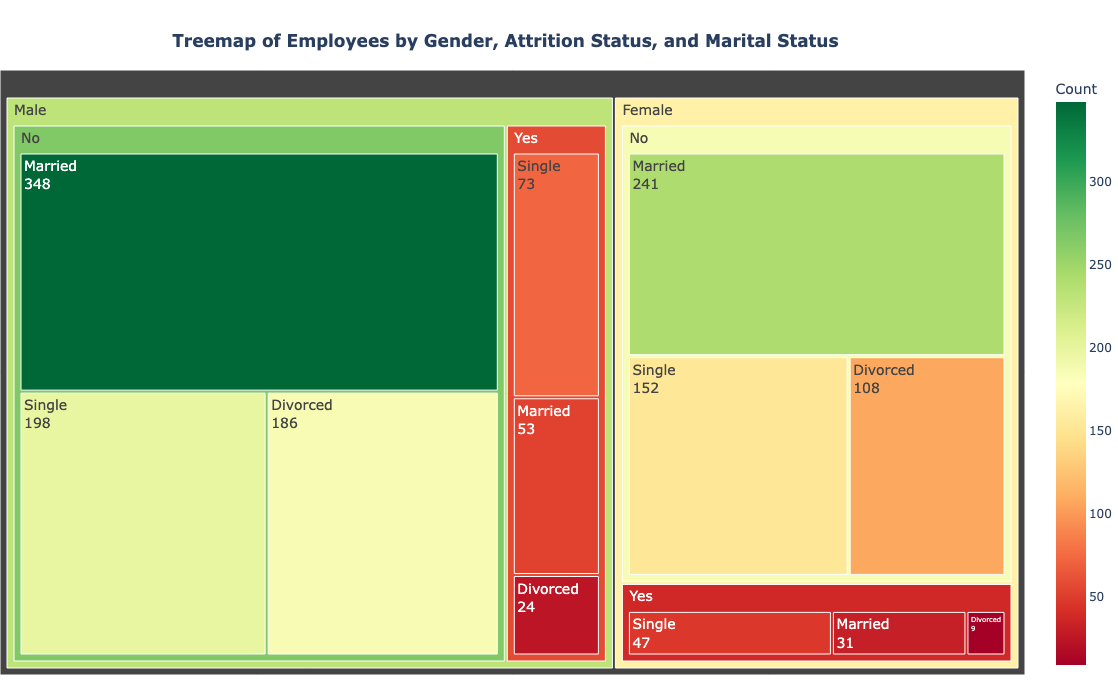

In [21]:
# Group by 'Gender', 'Attrition', and 'MaritalStatus', and count the number of employees
gender_attrition_marital_counts = df.groupby(['Gender', 'Attrition', 'Marital Status']).size().reset_index(name='Count')

# Create a treemap
figF = px.treemap(
    gender_attrition_marital_counts,
    path=['Gender', 'Attrition', 'Marital Status'],  # Define the hierarchical levels
    values='Count',  # Define the values for each level
    color='Count',  # Color by the number of employees
    color_continuous_scale='RdYlGn',  # Color scale from red to green
    title='<b>Treemap of Employees by Gender, Attrition Status, and Marital Status'
)

# Customize layout and add labels
figF.update_layout(
    title_x=0.75,  # Center the title horizontally
    title_y=0.95,  # Position the title slightly lower
    margin=dict(t=70, l=0, r=0, b=25),  # Adjust margins
    width=1100,  # Set plot width
    height=700,  # Set plot height
    autosize=True  # Ensure the plot scales correctly within the container
)

# Add labels to the treemap
figF.update_traces(
    textinfo='label+value',  # Show both label and value in each block
    textfont_size=14 # Set font size for labels
)

# Show the treemap
figF.show()


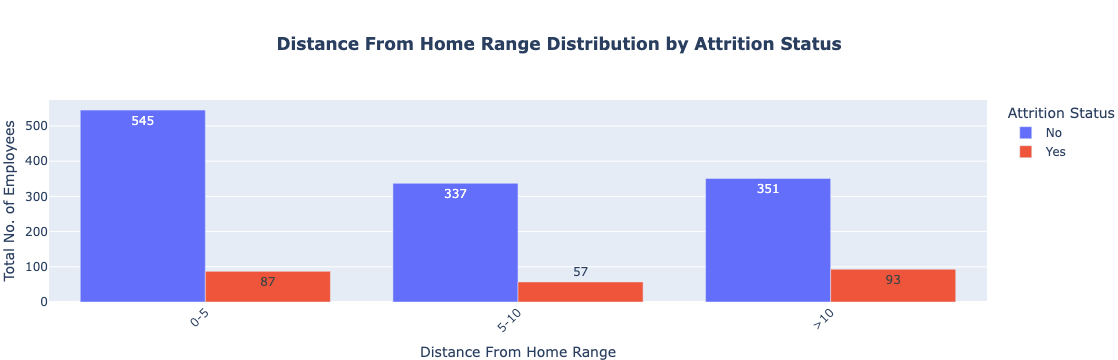

In [22]:
# Group by 'Age Range' and 'Attrition' and count occurrences
age_range_attrition_counts = df.groupby(['Distance From Home Range', 'Attrition'], observed="True").size().reset_index(name='Count')


# Create the bar chart
figH = px.bar(age_range_attrition_counts, 
             x='Distance From Home Range', 
             y='Count', 
             color='Attrition', 
             title='<b>Distance From Home Range Distribution by Attrition Status',
             labels={'Distance From Home Range': 'Age Range', 'Count': 'Total Number of Employees', 'Attrition': 'Attrition Status'},
             barmode='group',text_auto = True)  # Use 'group' to show bars side-by-side

# Customize layout for better visibility
figH.update_layout(
    xaxis_title='Distance From Home Range',
    yaxis_title='Total No. of Employees',
    title_x=0.5,  # Center the title horizontally
    margin=dict(t=100, l=20, r=0, b=20),  # Adjust margins to provide more space
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)


figH.show()




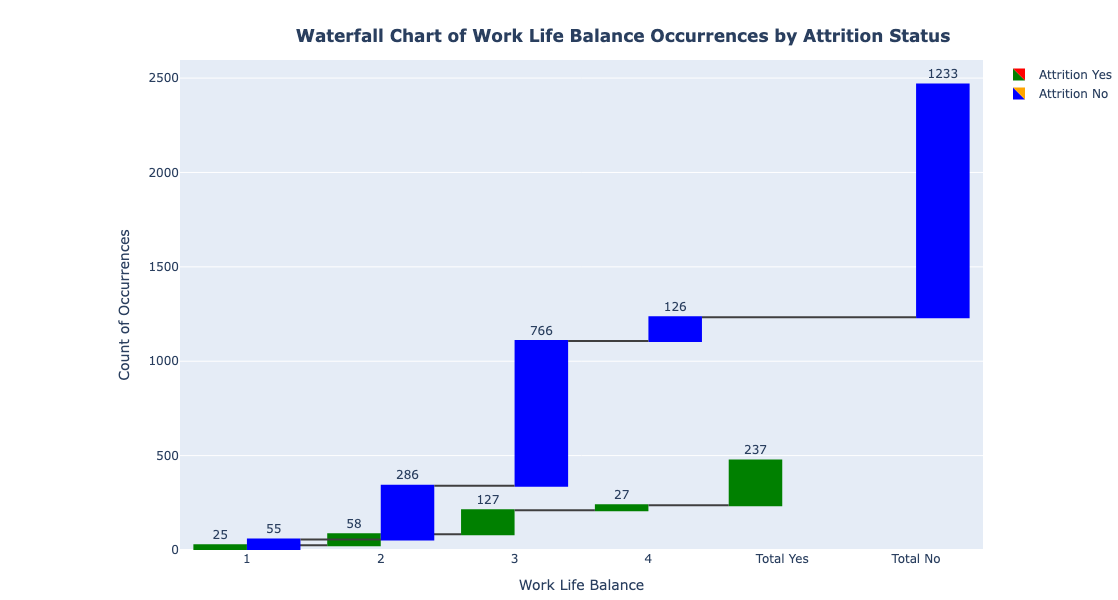

In [23]:

# Separate data for Attrition 'Yes' and 'No'
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']


# Group by 'Work Life Balance' and count occurrences for Attrition 'Yes'
workLifeBalance_counts_yes = df_yes['Work Life Balance'].value_counts().reset_index()
workLifeBalance_counts_yes.columns = ['Value', 'Count']
workLifeBalance_counts_yes = workLifeBalance_counts_yes.sort_values(by='Value')

# Group by 'Work Life Balance' and count occurrences for Attrition 'No'
workLifeBalance_counts_no = df_no['Work Life Balance'].value_counts().reset_index()
workLifeBalance_counts_no.columns = ['Value', 'Count']
workLifeBalance_counts_no = workLifeBalance_counts_no.sort_values(by='Value')

# Create the waterfall chart
figG = go.Figure()

# Add trace for Attrition 'Yes'
figG.add_trace(go.Waterfall(
    name="Attrition Yes",
    x=list(workLifeBalance_counts_yes['Value']) + ['Total Yes'],
    y=list(workLifeBalance_counts_yes['Count']) + [workLifeBalance_counts_yes['Count'].sum()],
    text=list(workLifeBalance_counts_yes['Count']) + [workLifeBalance_counts_yes['Count'].sum()],  # Display count values
    textposition="outside",  # Position text outside bars
    connector={"line": {"color": "rgb(63, 63, 63)"}},  # Connector line color
    increasing={"marker": {"color": "green"}},
    decreasing={"marker": {"color": "red"}},
    totals={"marker": {"color": "blue"}},  # Color for the 'Total Yes' bar
))

# Add trace for Attrition 'No'
figG.add_trace(go.Waterfall(
    name="Attrition No",
    x=list(workLifeBalance_counts_no['Value']) + ['Total No'],
    y=list(workLifeBalance_counts_no['Count']) + [workLifeBalance_counts_no['Count'].sum()],
    text=list(workLifeBalance_counts_no['Count']) + [workLifeBalance_counts_no['Count'].sum()],  # Display count values
    textposition="outside",  # Position text outside bars
    connector={"line": {"color": "rgb(63, 63, 63)"}},  # Connector line color
    increasing={"marker": {"color": "blue"}},
    decreasing={"marker": {"color": "orange"}},
    totals={"marker": {"color": "purple"}},  # Color for the 'Total No' bar
))

# Customize layout
figG.update_layout(
    title="<b>Waterfall Chart of Work Life Balance Occurrences by Attrition Status",
    title_x=0.85,  # Center the title horizontally
    title_y=0.95,  # Adjust vertical position of the title
    xaxis_title="Work Life Balance",
    yaxis_title="Count of Occurrences",
    xaxis_type='category',  # Ensure x-axis is categorical
    showlegend=True,  # Show legend to differentiate between Attrition Yes and No
    width=1000,  # Set plot width
    height=600,  # Set plot height
    margin=dict(l=180, r=0, t=60, b=50)  # Adjust margins to center the figure
)

# Show the waterfall chart
figG.show()


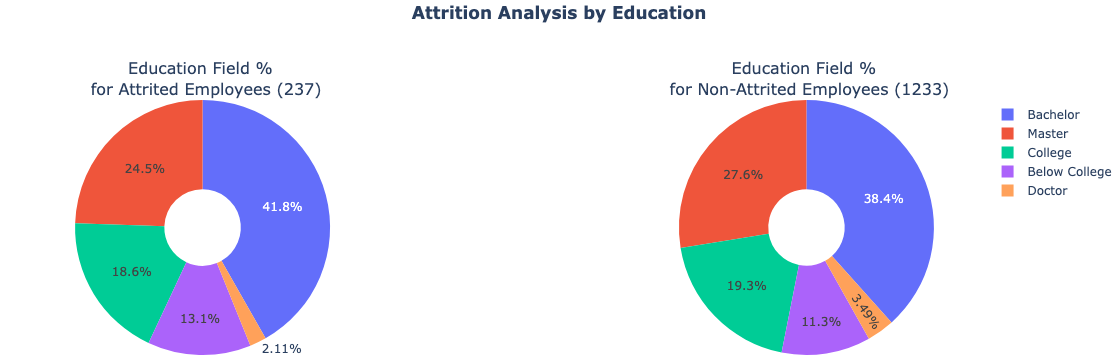

In [24]:
# Assuming df_attrition_yes and df_attrition_no are DataFrames filtered for attrited and non-attrited employees respectively

# Group by 'EducationField' and count the occurrences for attrited and non-attrited employees
education_yes_counts = df_attrition_yes['Education'].value_counts().reset_index(name='Count')
education_no_counts = df_attrition_no['Education'].value_counts().reset_index(name='Count')

# Create subplots with 1 row and 2 columns
figI = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=(
        f'Education Field % <br> for Attrited Employees ({attrition_yes_count})', 
        f'Education Field % <br> for Non-Attrited Employees ({attrition_no_count})'
    ),
    vertical_spacing=0.4,  # Adjust vertical spacing between rows
    horizontal_spacing=0.3  # Adjust horizontal spacing between columns
)

# Create and add the first pie chart for attrited employees
fig1I = px.pie(education_yes_counts, 
              values='Count', 
              names='Education', 
              hole=0.3,
              title=f'Attrited Employees (n={attrition_yes_count})'
             )
figI.add_trace(fig1I.data[0], row=1, col=1)

# Create and add the second pie chart for non-attrited employees
fig2I = px.pie(education_no_counts, 
              values='Count', 
              names='Education', 
              hole=0.3,
              title=f'Non-Attrited Employees (n={attrition_no_count})'
             )
figI.add_trace(fig2I.data[0], row=1, col=2)

# Update layout to include titles and adjust spacing
figI.update_layout(
    title_text='<b>Attrition Analysis by Education',
    title_x=0.5,  # Center the title horizontally
    title_y=0.98,  # Position the title slightly lower
    margin=dict(l=35, r=20, t=100, b=0)  # Adjust margins to ensure enough space
)

# Show the combined figure
figI.show()


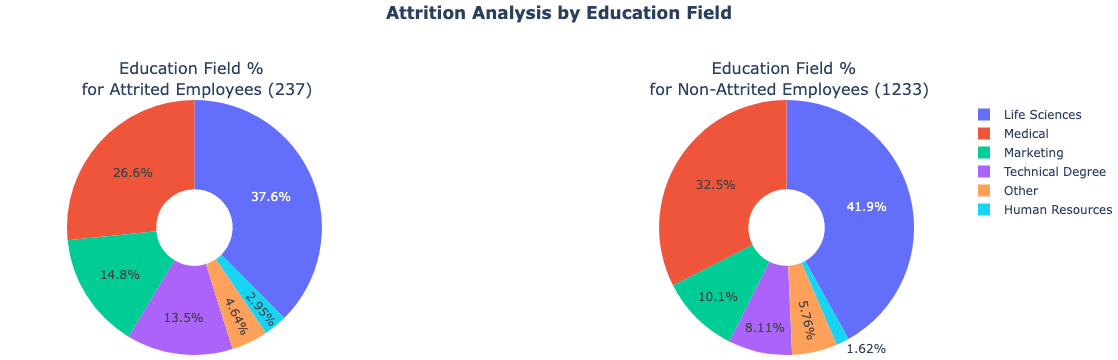

In [25]:
# Assuming df_attrition_yes and df_attrition_no are DataFrames filtered for attrited and non-attrited employees respectively

# Group by 'EducationField' and count the occurrences for attrited and non-attrited employees
education_yes_counts = df_attrition_yes['Education Field'].value_counts().reset_index(name='Count')
education_no_counts = df_attrition_no['Education Field'].value_counts().reset_index(name='Count')

# Create subplots with 1 row and 2 columns
figI = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=(
        f'Education Field % <br> for Attrited Employees ({attrition_yes_count})', 
        f'Education Field % <br> for Non-Attrited Employees ({attrition_no_count})'
    ),
    vertical_spacing=0.4,  # Adjust vertical spacing between rows
    horizontal_spacing=0.3  # Adjust horizontal spacing between columns
)

# Create and add the first pie chart for attrited employees
fig1I = px.pie(education_yes_counts, 
              values='Count', 
              names='Education Field', 
              hole=0.3,
              title=f'Attrited Employees (n={attrition_yes_count})'
             )
figI.add_trace(fig1I.data[0], row=1, col=1)

# Create and add the second pie chart for non-attrited employees
fig2I = px.pie(education_no_counts, 
              values='Count', 
              names='Education Field', 
              hole=0.3,
              title=f'Non-Attrited Employees (n={attrition_no_count})'
             )
figI.add_trace(fig2I.data[0], row=1, col=2)

# Update layout to include titles and adjust spacing
figI.update_layout(
    title_text='<b>Attrition Analysis by Education Field',
    title_x=0.5,  # Center the title horizontally
    title_y=0.98,  # Position the title slightly lower
    margin=dict(l=35, r=20, t=100, b=0)  # Adjust margins to ensure enough space
)

# Show the combined figure
figI.show()


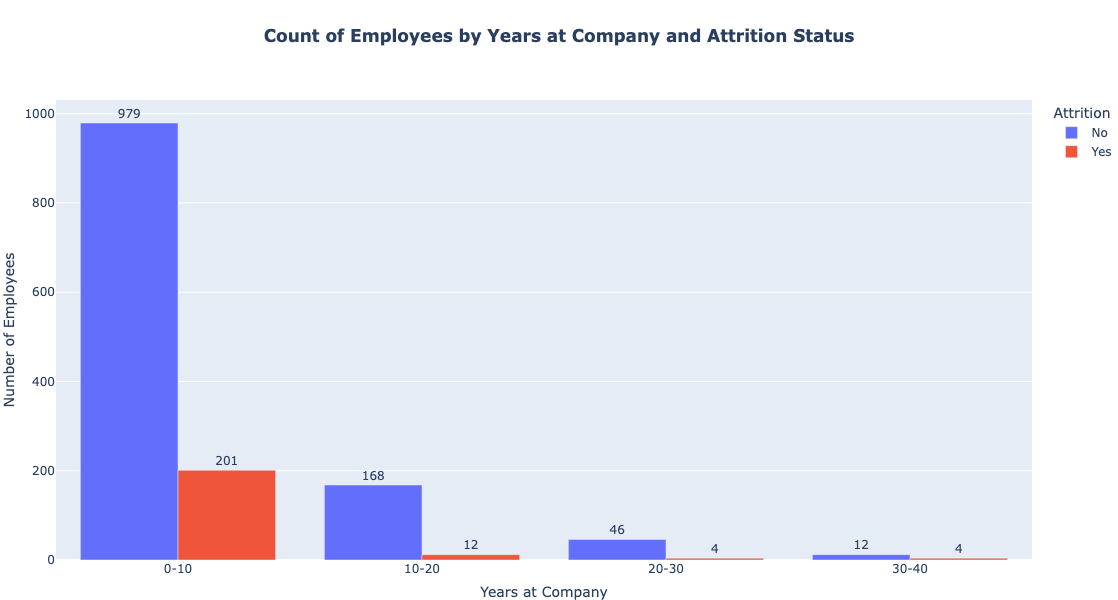

In [26]:
# Group by 'Attrition' and 'YearsAtCompany', and count the number of employees
years_at_company_counts = df.groupby(['Attrition', 'Years At Company Range'], observed= False).size().reset_index(name='Count')

# Create the bar chart
figK = px.bar(
    years_at_company_counts,
    x='Years At Company Range',
    y='Count',
    color='Attrition',
    barmode='group',
    title='<b>Count of Employees by Years at Company and Attrition Status',
    labels={'YearsAtCompany': 'Years at Company', 'Count': 'Number of Employees'},
    text='Count'  # Add this line to include labels
)

# Customize layout
figK.update_layout(
    title_x=0.5,
    title_y=0.95,
    xaxis_title='Years at Company',
    yaxis_title='Number of Employees',
    margin=dict(t=100, l=20, r=0, b=20),  # Adjust margins to provide more space
    height=600
)

# Update trace to format labels
figK.update_traces(texttemplate='%{text}', textposition='outside')

# Show the bar chart
figK.show()


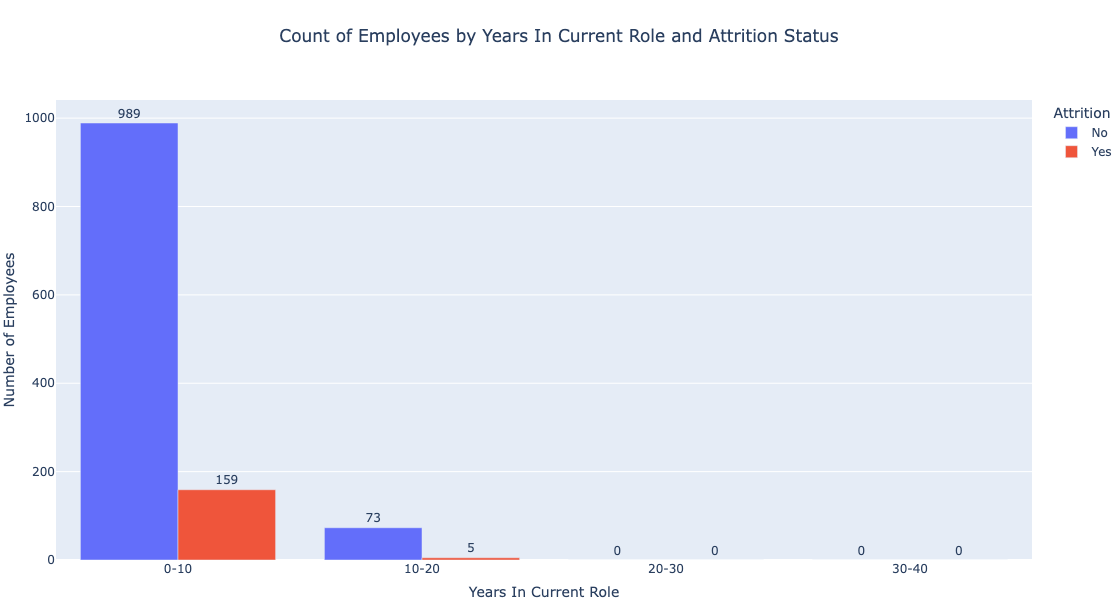

In [27]:
# Group by 'Attrition' and 'YearsAtCompany', and count the number of employees
years_at_company_counts = df.groupby(['Attrition', 'Years In Current Role Range'], observed= False).size().reset_index(name='Count')

# Create the bar chart
figL = px.bar(
    years_at_company_counts,
    x='Years In Current Role Range',
    y='Count',
    color='Attrition',
    barmode='group',
    title='Count of Employees by Years In Current Role and Attrition Status',
    labels={'Years In Current Role': 'Years In Current Role', 'Count': 'Number of Employees'},
    text='Count'  # Add this line to include labels
)

# Customize layout
figL.update_layout(
    title_x=0.5,
    title_y=0.95,
    xaxis_title='Years In Current Role',
    yaxis_title='Number of Employees',
    margin=dict(t=100, l=20, r=0, b=20),  # Adjust margins to provide more space
    height=600
)

# Update trace to format labels
figL.update_traces(texttemplate='%{text}', textposition='outside')

# Show the bar chart
figL.show()


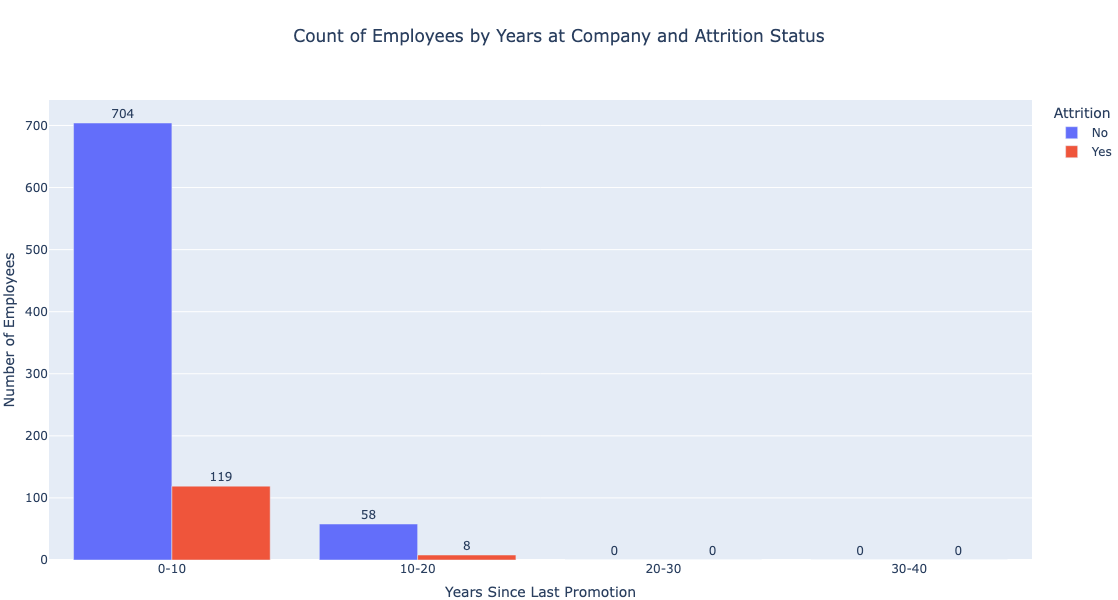

In [28]:
# Group by 'Attrition' and 'YearsAtCompany', and count the number of employees
years_at_company_counts = df.groupby(['Attrition', 'Years Since Last Promotion Range'], observed= False).size().reset_index(name='Count')

# Create the bar chart
figM = px.bar(
    years_at_company_counts,
    x='Years Since Last Promotion Range',
    y='Count',
    color='Attrition',
    barmode='group',
    title='Count of Employees by Years at Company and Attrition Status',
    labels={'Years Since Last Promotion': 'Years Since Last Promotion', 'Count': 'Number of Employees'},
    text='Count'  # Add this line to include labels
)

# Customize layout
figM.update_layout(
    title_x=0.5,
    title_y=0.95,
    xaxis_title='Years Since Last Promotion',
    yaxis_title='Number of Employees',
    margin=dict(t=100, l=20, r=0, b=20),  # Adjust margins to provide more space
    height=600
)

# Update trace to format labels
figM.update_traces(texttemplate='%{text}', textposition='outside')

# Show the bar chart
figM.show()


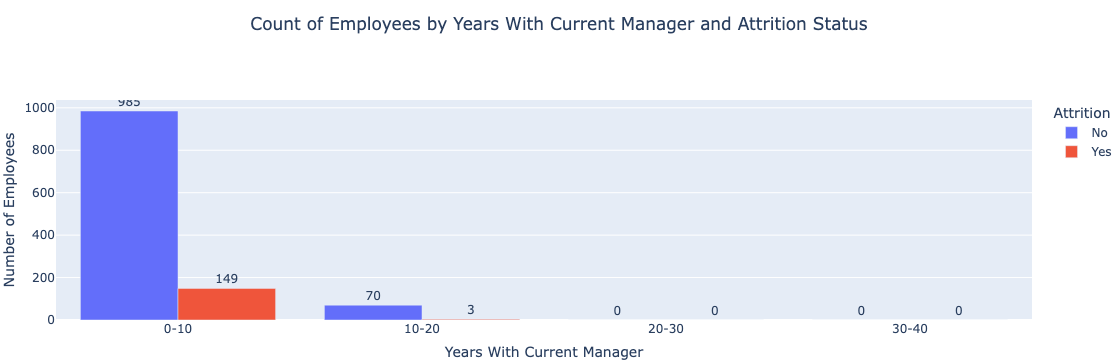

In [29]:
# Group by 'Attrition' and 'YearsAtCompany', and count the number of employees
years_at_company_counts = df.groupby(['Attrition', 'Years With Current Manager Range'], observed= False).size().reset_index(name='Count')

# Create the bar chart
figN = px.bar(
    years_at_company_counts,
    x='Years With Current Manager Range',
    y='Count',
    color='Attrition',
    barmode='group',
    title='Count of Employees by Years With Current Manager and Attrition Status',
    labels={'Years With Current Manager': 'Years With Current Manager', 'Count': 'Number of Employees'},
    text='Count'  # Add this line to include labels
)

# Customize layout
figN.update_layout(
    title_x=0.5,
    title_y=0.95,
    xaxis_title='Years With Current Manager',
    yaxis_title='Number of Employees',
    margin=dict(t=100, l=20, r=0, b=20),  # Adjust margins to provide more space
    height=600
)

# Update trace to format labels
figN.update_traces(texttemplate='%{text}', textposition='outside')

# Show the bar chart
figN.show()
